In [5]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('co2.csv', parse_dates=['date'], index_col='date')


In [6]:
data 

,co2
date,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2


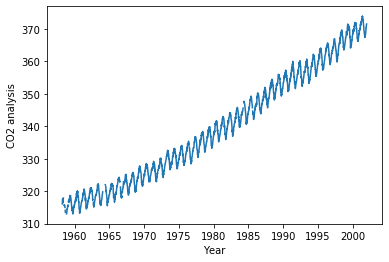

In [7]:
plt.xlabel('Year')
plt.ylabel('CO2 analysis')
plt.plot(data)


In [8]:
y = data['co2'].resample('MS').mean()

In [9]:
y.isnull().sum()

5

In [0]:
y

date
1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
1958-08-01    314.950000
1958-09-01    313.500000
1958-10-01           NaN
1958-11-01    313.425000
1958-12-01    314.700000
1959-01-01    315.500000
1959-02-01    316.700000
1959-03-01    316.733333
1959-04-01    317.675000
1959-05-01    318.325000
1959-06-01    318.025000
1959-07-01    316.525000
1959-08-01    314.900000
1959-09-01    313.825000
1959-10-01    313.400000
1959-11-01    314.875000
1959-12-01    315.525000
1960-01-01    316.380000
1960-02-01    316.975000
1960-03-01    317.575000
1960-04-01    319.120000
1960-05-01    319.925000
1960-06-01    319.450000
1960-07-01    318.060000
1960-08-01    315.775000
                 ...    
1999-07-01    369.000000
1999-08-01    366.700000
1999-09-01    364.675000
1999-10-01    365.140000
1999-11-01    366.650000
1999-12-01    367.900000
2000-01-01    369.020000
2000-02-01    369.375000
2000-03-01    370.40

In [10]:
y = y.fillna(y.ffill())

In [0]:
y

date
1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    317.433333
1958-07-01    315.625000
1958-08-01    314.950000
1958-09-01    313.500000
1958-10-01    313.500000
1958-11-01    313.425000
1958-12-01    314.700000
1959-01-01    315.500000
1959-02-01    316.700000
1959-03-01    316.733333
1959-04-01    317.675000
1959-05-01    318.325000
1959-06-01    318.025000
1959-07-01    316.525000
1959-08-01    314.900000
1959-09-01    313.825000
1959-10-01    313.400000
1959-11-01    314.875000
1959-12-01    315.525000
1960-01-01    316.380000
1960-02-01    316.975000
1960-03-01    317.575000
1960-04-01    319.120000
1960-05-01    319.925000
1960-06-01    319.450000
1960-07-01    318.060000
1960-08-01    315.775000
                 ...    
1999-07-01    369.000000
1999-08-01    366.700000
1999-09-01    364.675000
1999-10-01    365.140000
1999-11-01    366.650000
1999-12-01    367.900000
2000-01-01    369.020000
2000-02-01    369.375000
2000-03-01    370.40

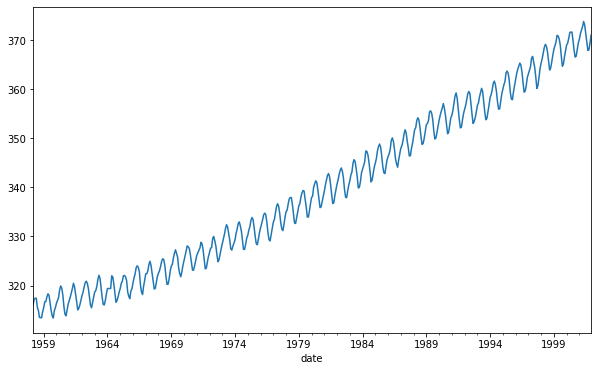

In [11]:
y.plot(figsize=(10, 6))

In [12]:
rollingmean = y.rolling(window=12).mean()
rollingstd = y.rolling(window=12).std()


Text(0.5, 1.0, 'Rolling Mean ')

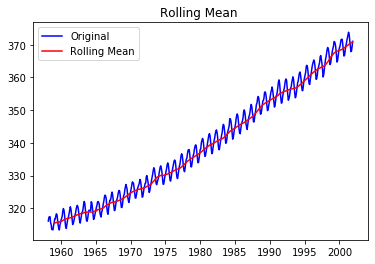

In [13]:
orig = plt.plot(y, color='blue', label='Original')
mean = plt.plot(rollingmean , color='red', label='Rolling Mean')
#std = plt.plot(rollingstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean ')


Text(0.5, 1.0, 'Rolling Std')

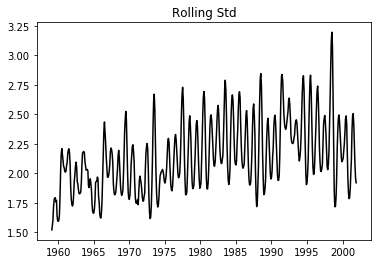

In [14]:
std = plt.plot(rollingstd, color='black', label='Rolling Std')
plt.title('Rolling Std')

In [15]:
deco = sm.tsa.seasonal_decompose(y, model='additive')

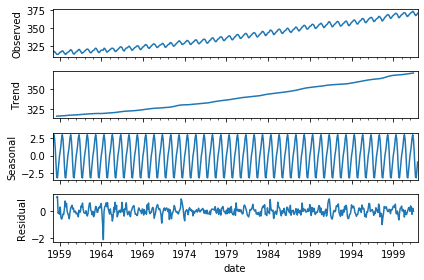

In [16]:
fig = deco.plot()


In [17]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

In [18]:
TSresults = mod.fit()

In [19]:
print(TSresults.summary())


                                 Statespace Model Results                                 
Dep. Variable:                                co2   No. Observations:                  526
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -136.096
Date:                            Mon, 16 Sep 2019   AIC                            282.193
Time:                                    18:28:22   BIC                            303.256
Sample:                                03-01-1958   HQIC                           290.459
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2859      0.106      2.685      0.007       0.077       0.495
ma.L1         -0.6132      0.092   

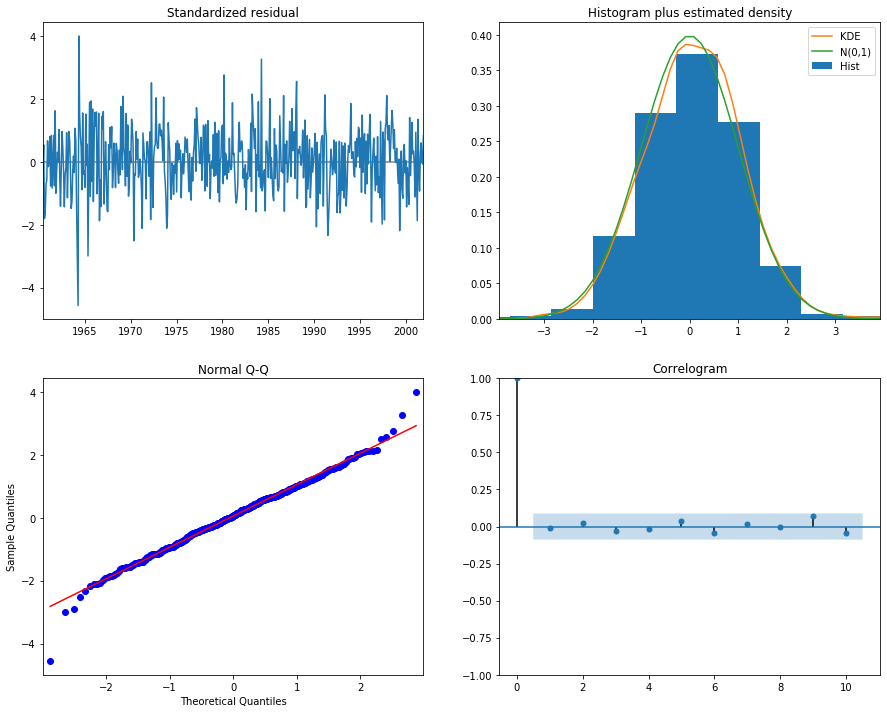

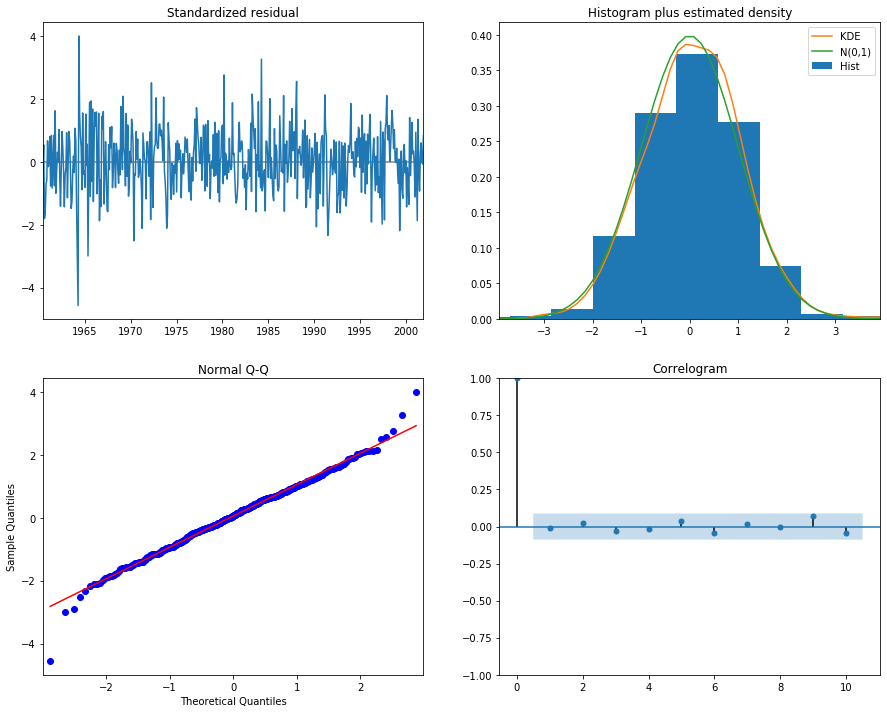

In [20]:
TSresults.plot_diagnostics(figsize=(15, 12))

In [21]:
pred = TSresults.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)

In [22]:
pred_ci = pred.conf_int()


In [0]:
pred_ci


,lower co2,upper co2
date,,
1998-01-01,364.442461,365.670858
1998-02-01,365.366448,366.594845
1998-03-01,366.396683,367.625080
1998-04-01,367.905909,369.134306
1998-05-01,368.391537,369.619934
1998-06-01,367.790138,369.018535
1998-07-01,366.471770,367.700167
1998-08-01,364.731084,365.959481
1998-09-01,363.176560,364.404957


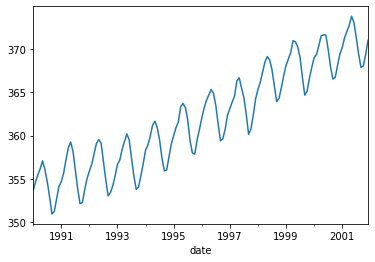

In [23]:
ax = y['1990':].plot(label='observed')

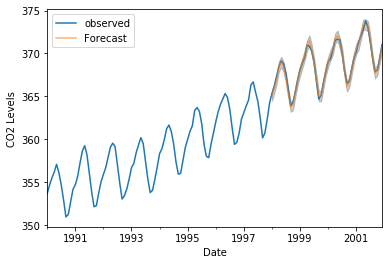

In [24]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.6)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

In [25]:
pred_ci

,lower co2,upper co2
date,,
1998-01-01,364.442462,365.670861
1998-02-01,365.366449,366.594848
1998-03-01,366.396684,367.625083
1998-04-01,367.905910,369.134309
1998-05-01,368.391538,369.619936
1998-06-01,367.790138,369.018537
1998-07-01,366.471770,367.700169
1998-08-01,364.731085,365.959483
1998-09-01,363.176561,364.404960


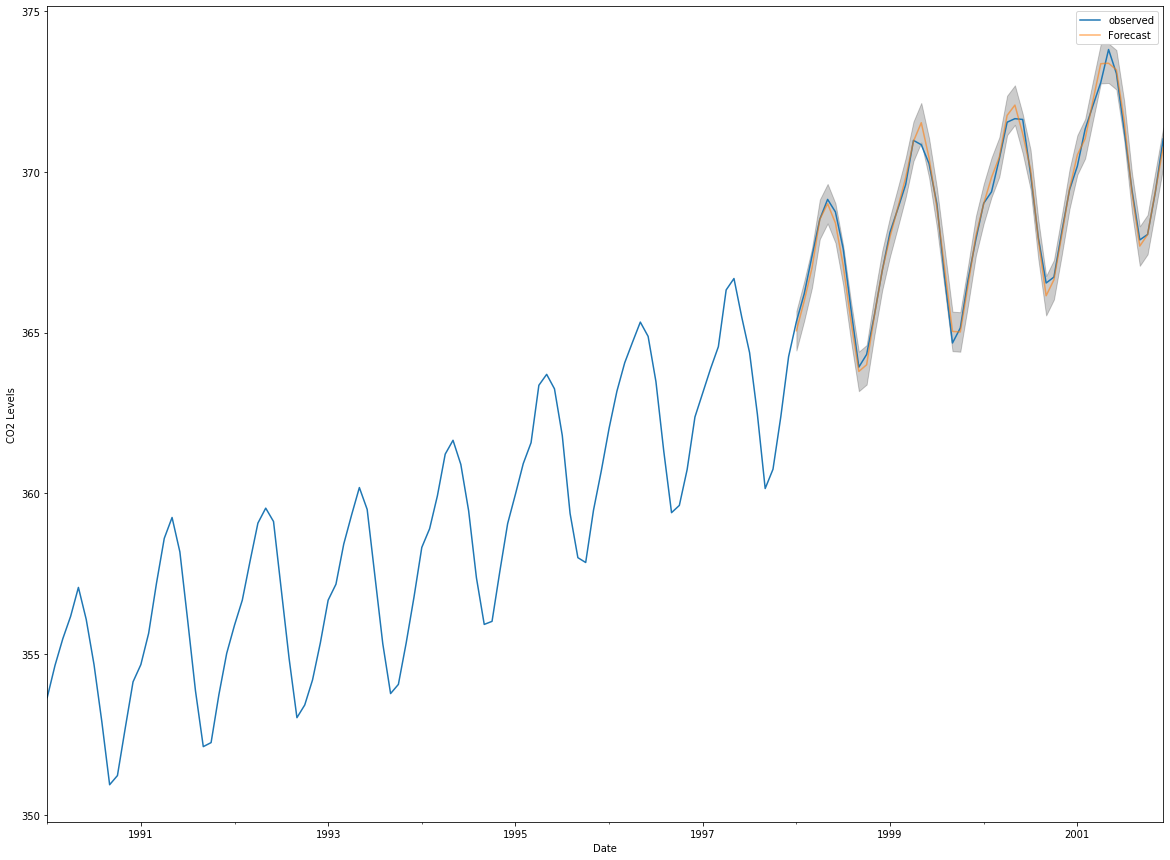

In [26]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.6, figsize=(20, 15))

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()

In [27]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

In [28]:
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


In [29]:
pred_dynamic = TSresults.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

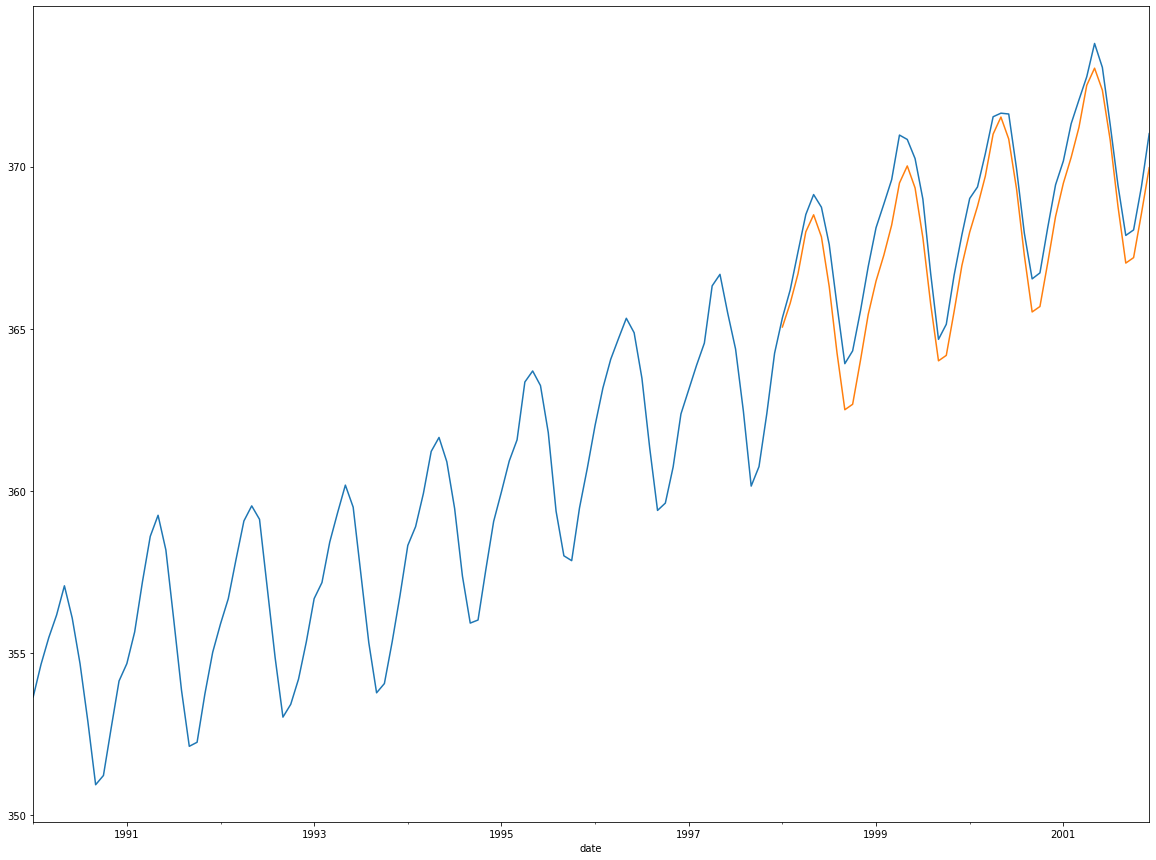

In [30]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

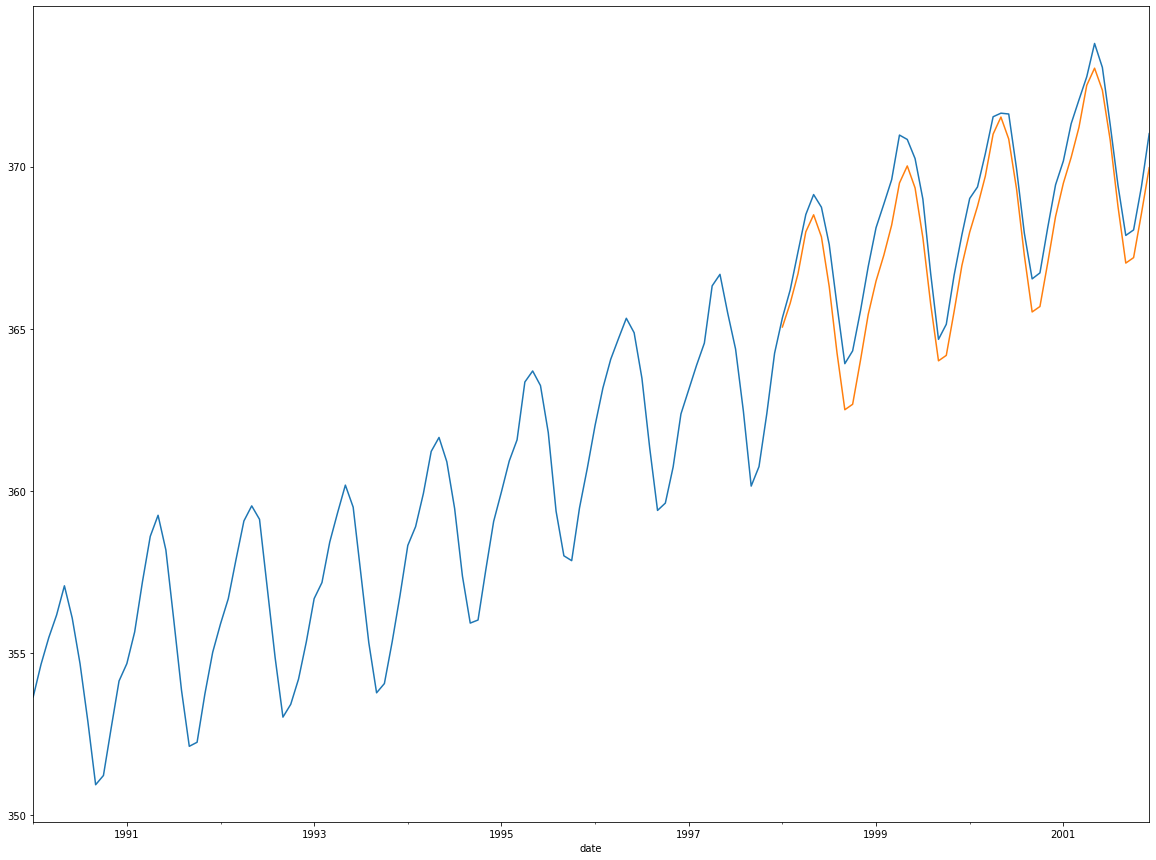

In [31]:
pred_dynamic = TSresults.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)


In [32]:
pred_uc = TSresults.get_forecast(steps=500)

In [33]:
pred_ci = pred_uc.conf_int()

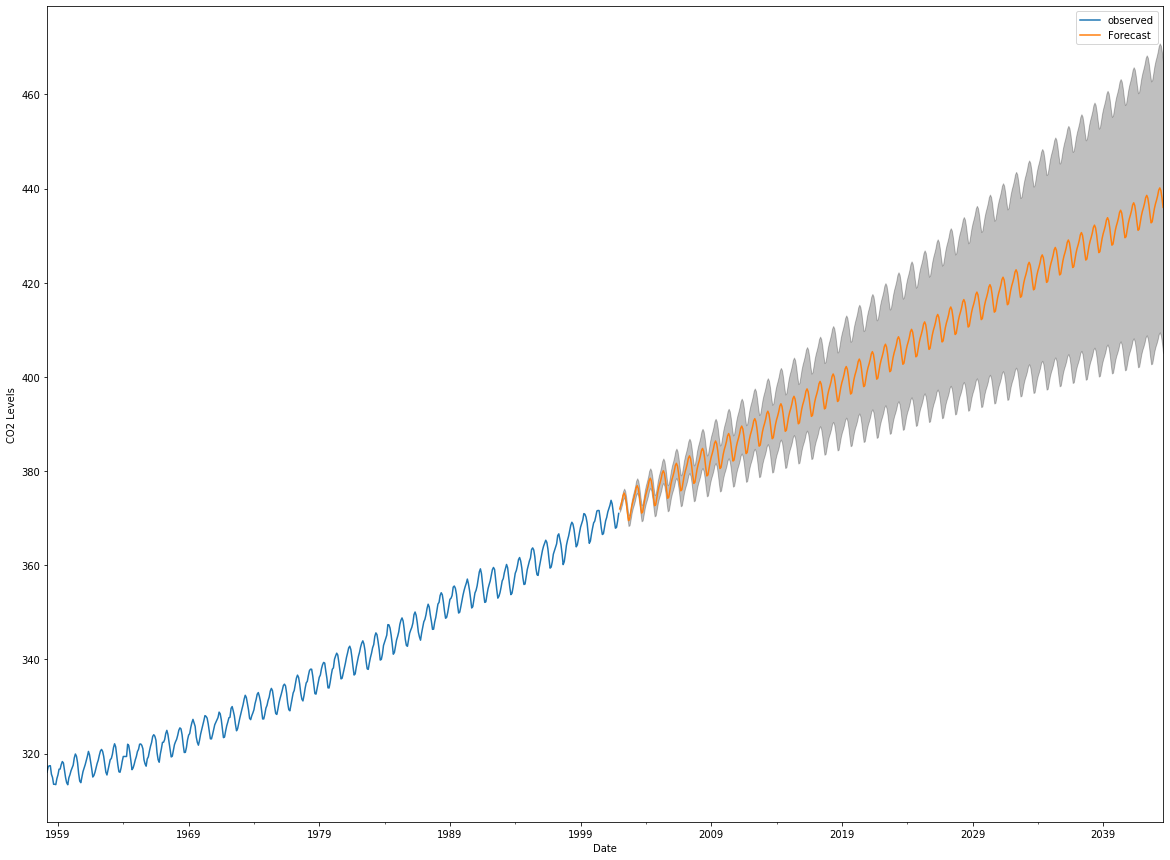

In [34]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()

In [35]:
import itertools   
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
print(pdq)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print(seasonal_pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [36]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [37]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7612.550479816482
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.291826170449
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1850.5850613635434
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1574.3504839682914
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1048.5970798289013
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1048.1620793544878
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1337.630747886763
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1030.368754964321
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.020381117517
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.599981384266
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1376.9720853536996
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1232.0424251241202
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:797.1979776191519
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:779.3117139776965
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1110.4848004960254
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:801.2102418161007
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1675.8086923024293
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1222.3590884244363
A